# 3D to 2D

In [396]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import mpl_toolkits.mplot3d as plt3d
import itertools

In [481]:
# This function generates the points.
def create_points():
    points_map = {}
    points_list = list(itertools.permutations([-0.5,-0.5,-0.5,0,0,0,0.5,0.5,0.5], 3))
    new_points_list = []
    for each in points_list:
        if each in points_map:
            continue
        else:
            points_map[each] = 1
            new_points_list.append([each[0], each[1], each[2]]) 
    return np.array(new_points_list)

In [450]:
def preset_cams():
    r = 5
    focal_length = 0.06
    width = 256
    height = 256
    alpha = np.pi/6
    beta = np.pi/6
    
    cam1 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    
    alpha = np.pi/3
    beta = np.pi/6
    
    cam2 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    
    return cam1, cam2

In [451]:
def camera_coordinate_system(cam):
    zcam = np.array(cam['target']) - np.array(cam['position'])
    xcam = np.cross(zcam, cam['up'])
    ycam = np.cross(zcam, xcam)
    
    zcam = zcam / np.linalg.norm(zcam)
    xcam = xcam / np.linalg.norm(xcam)
    ycam = ycam / np.linalg.norm(ycam)
    
    origin = cam['position']
    return xcam, ycam, zcam, origin

In [452]:
cam1, cam2 = preset_cams()

In [493]:
#This is the transformation between the world and camera coordinates 
def extrinsics_matrix(cam):
    xcam, ycam, zcam, origin = camera_coordinate_system(cam)
    R = np.array([xcam[:], ycam[:], zcam[:]])
    t = np.dot(R, origin)
    M = np.append(R.T, [np.round(-t, 2)], axis = 0)
    return M

In [495]:
#This is the calibration matrix which describes the camera cordinates to the pixel space
def intrinsics_matrix(cam):
    x_0 = (cam['width']+1) * 0.5
    y_0 = (cam['height']+1) * 0.5
    f_x = cam['focal_length'] * cam['width'] / cam['film_width']
    f_y = cam['focal_length'] * cam['height'] / cam['film_height']
    K = [[f_x, 0, x_0] ,[0, f_y, y_0] , [0, 0, 1]]
    return np.array(K).T

In [496]:
#This is the camera matrix
def camera_matrix(cam):
    M = extrinsics_matrix(cam)
    K = intrinsics_matrix(cam)
    P = np.dot(M, K)
    return P
    

In [497]:
#Converting the points from 3D to 2D
def world2image(cam, points):
    P = camera_matrix(cam)
    points = np.reshape(points, (27, 3))
    pt = np.append(points, np.ones((27, 1)), axis=1)
    pt = np.dot(pt, P)
    x = pt[:, 0] / pt[:, 2]
    y = pt[:, 1] / pt[:, 2]
    points2d = []
    for i in range(0, len(x)):
        points2d.append([x[i], y[i]])
    return points2d, x, y

In [498]:
points2d, x, y = world2image(cam1, points)
points2d2, x2, y2 = world2image(cam2, points)

In [499]:
def color_list():
    color_list = ['Red', 'Red', 'Red', 'Green', 'Green', 'Green', 'Blue', 'Blue', 'Blue', 'Orange', 'Orange', 'Orange', 'Yellow', 'Yellow', 'Yellow', 'Purple', 'Purple', 'Purple', 'Pink', 'Pink', 'Pink', 'White', 'White', 'White', 'Brown', 'Brown', 'Brown']
    return color_list

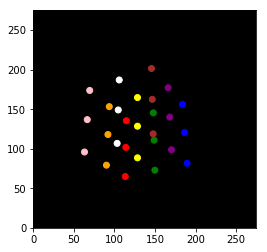

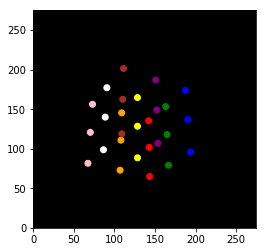

In [500]:
#Plotting the points on a canvas
colors = color_list()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('black')
ax.scatter(x, y, c = colors)
ax.set_xlim([0, 275])
ax.set_ylim([0, 275])
plt.show()
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('black')
ax.scatter(x2, y2, c = colors)
ax.set_xlim([0, 275])
ax.set_ylim([0, 275])
plt.show()

In [509]:
def third_camera():
    r = 5
    focal_length = 0.06
    width = 256
    height = 256
    alpha = np.pi/3
    beta = np.pi/3
    
    cam3 = { 'position': [r * np.cos(beta) * np.cos(alpha), r * np.cos(beta) * np.sin(alpha), r * np.sin(beta)],
           'target':[0,0,0],
           'up':[0,0,1],
           'focal_length':focal_length,
           'film_width':0.035,
           'film_height':0.035,
           'width':width,
           'height':height,
           }
    return cam3

In [510]:
cam3 = third_camera()

In [511]:
points2d3, x3, y3 = world2image(cam3, points)

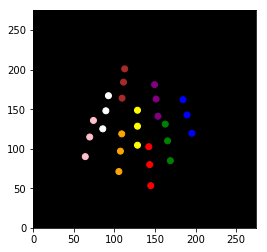

In [512]:
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('black')
ax.scatter(x3, y3, c = colors)
ax.set_xlim([0, 275])
ax.set_ylim([0, 275])
plt.show()